In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\User\Pictures\car data.csv')

In [3]:
df['car_age'] = 2020-df['Year']

In [4]:
df = df.drop(['Car_Name', 'Year'], axis=1)

In [5]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [6]:
dff = df.copy()

In [7]:
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [8]:
df1 = pd.get_dummies(dff['Fuel_Type'])
df1

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [9]:
df2 = pd.get_dummies(dff['Seller_Type'])
df2

,Dealer,Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
296,1,0
297,1,0
298,1,0
299,1,0


In [10]:
df3 = pd.get_dummies(dff['Transmission'])
df3

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
296,0,1
297,0,1
298,0,1
299,0,1


In [11]:
dff = pd.concat([dff, df1, df2, df3], axis=1)
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1,0,1,0,0,1


In [12]:
dff = dff.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1)
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


In [13]:
X = dff.drop('Selling_Price', axis=1)
y = dff['Selling_Price']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Multiple Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
reg.score(X_train, y_train)

0.879844039130107

In [20]:
reg.score(X_test, y_test)

0.8589039971922936

In [21]:
y_pred = reg.predict(X_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
r2_score(y_pred, y_test)

0.8496323662485322

In [24]:
mean_squared_error(y_test, y_pred)

3.7871262249681137

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.9460540138876192

In [26]:
reg.intercept_

4.246200533100766

In [27]:
reg.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
       -1.07524438e+00,  1.54400189e+00, -4.68757513e-01,  6.10083723e-01,
       -6.10083723e-01,  5.04341411e-01, -5.04341411e-01])

# Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_reg = PolynomialFeatures(degree=2)

In [30]:
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)

In [31]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2, y_train)

LinearRegression(normalize=True)

In [32]:
test_pred = lin_reg.predict(X_test_2)
train_pred = lin_reg.predict(X_train_2)

In [33]:
r2_score(y_test, test_pred)

-3.590658958231184e+21

In [34]:
r2_score(y_train, train_pred)

0.9794816392147966

In [35]:
from sklearn import metrics

In [36]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    

In [37]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 80322810968.77206
MSE: 9.63760732766222e+22
RMSE: 310444960140.47675
R2 Square -3.590658958231184e+21
Train set evaluation:
_____________________________________
MAE: 0.5417662760416666
MSE: 0.5218723072306315
RMSE: 0.7224073000950582
R2 Square 0.9794816392147966


# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

In [41]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [59]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [52]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [53]:
print("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)

ridge regression train score low alpha: 0.8661879485389226
ridge regression test score low alpha: 0.855947724974691


In [60]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [61]:
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

ridge regression train score high alpha: 0.8661879485389226
ridge regression test score high alpha: 0.855947724974691


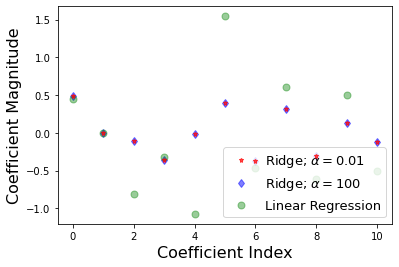

In [62]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

# Lasso Regression 

In [63]:
from sklearn.linear_model import Lasso

In [65]:
lasso = Lasso()
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8354914383067131
0.8072247669187322


In [66]:
lasso0001 = Lasso()
lasso0001.fit(X_train, y_train)
print(lasso0001.score(X_train, y_train))
print(lasso0001.score(X_test, y_test))

0.8354914383067131
0.8072247669187322


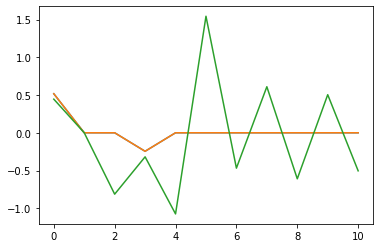

In [69]:
plt.plot(lasso.coef_)
plt.plot(lasso0001.coef_)
plt.plot(reg.coef_)